In [1]:
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'
from urllib.request import urlretrieve
urlretrieve(medical_charges_url, 'medical.csv')


('medical.csv', <http.client.HTTPMessage at 0x205eadcce00>)

In [78]:
import pandas as pd
import numpy as np

In [3]:
medical_df = pd.read_csv('medical.csv')
medical_df


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [9]:
medical_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

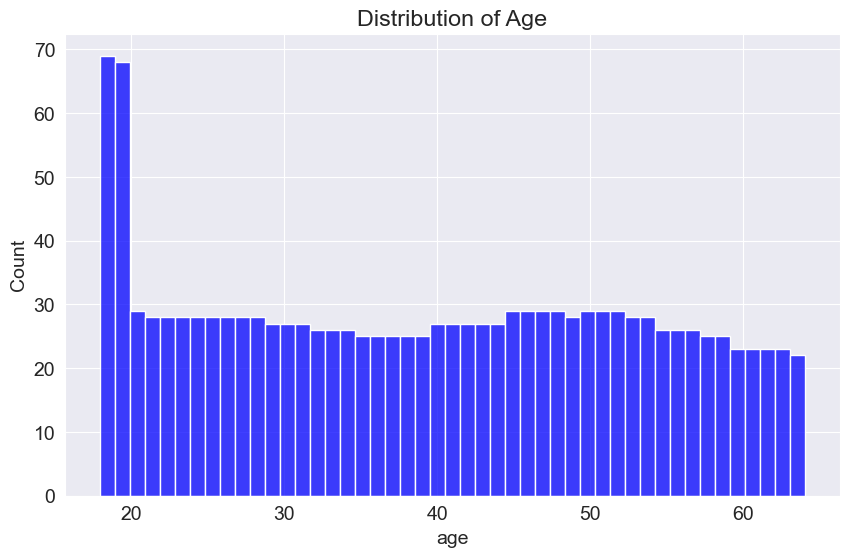

In [12]:
sns.histplot(medical_df['age'], bins=47, kde=False, color='blue')
plt.title('Distribution of Age')
plt.show()

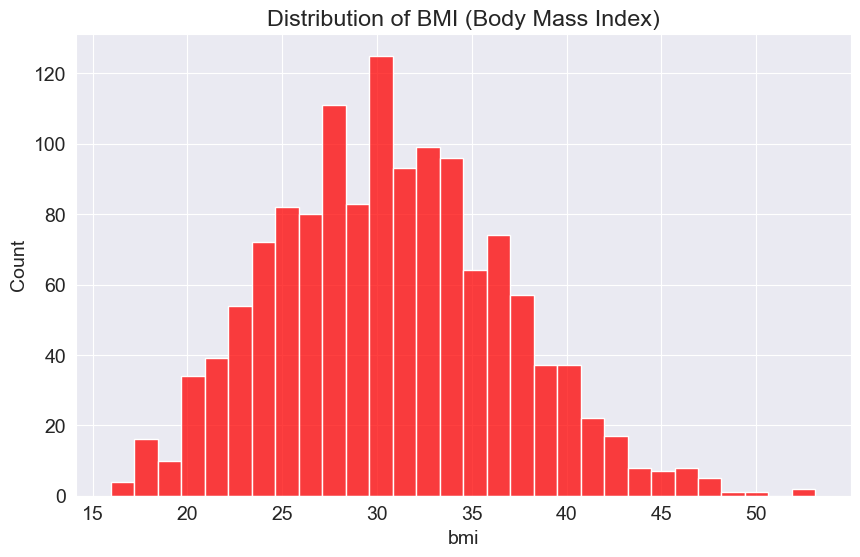

In [15]:
sns.histplot(medical_df['bmi'], bins=30, color='red', kde=False)
plt.title('Distribution of BMI (Body Mass Index)')
plt.show()


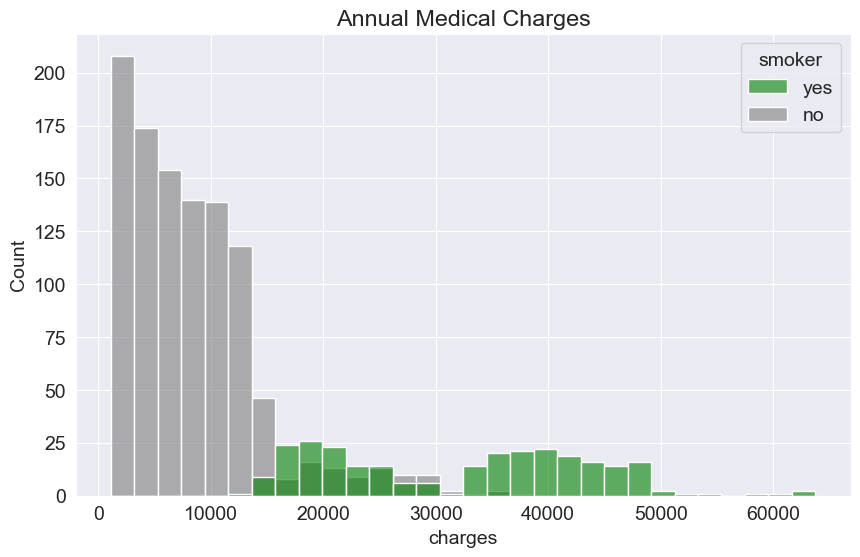

In [19]:
sns.histplot(data=medical_df, x='charges', hue='smoker', bins=30, palette=['green', 'grey'], alpha=0.6)
plt.title('Annual Medical Charges')
plt.show()

<Figure size 1200x600 with 0 Axes>

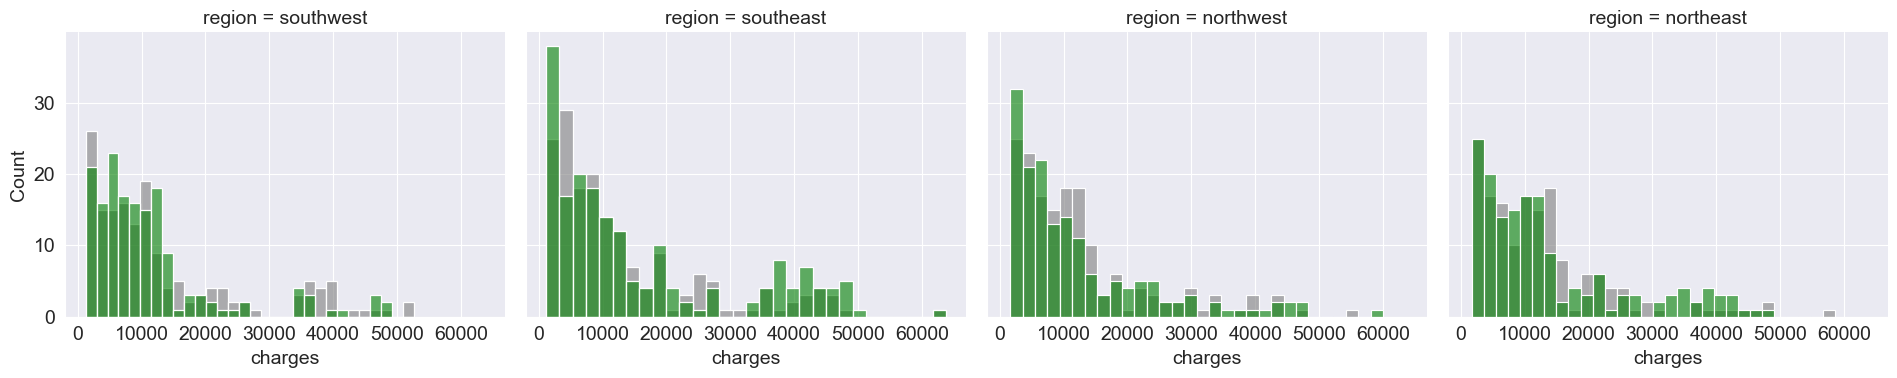

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
g = sns.FacetGrid(medical_df, col="region", height=4, aspect=1.2)
g.map_dataframe(sns.histplot, x="charges", hue="sex", bins=30, alpha=0.6, palette=['green', 'grey'])
plt.show()
# Green → Male
#Grey → Female

In [28]:
medical_df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

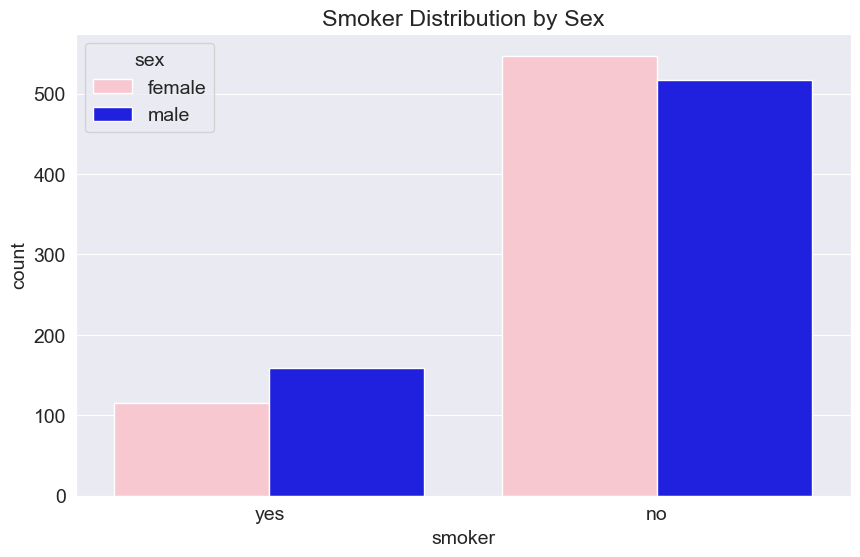

In [33]:
sns.countplot(data=medical_df, x='smoker', hue='sex', palette=['pink', 'blue'])
plt.title('Smoker Distribution by Sex')
plt.show()


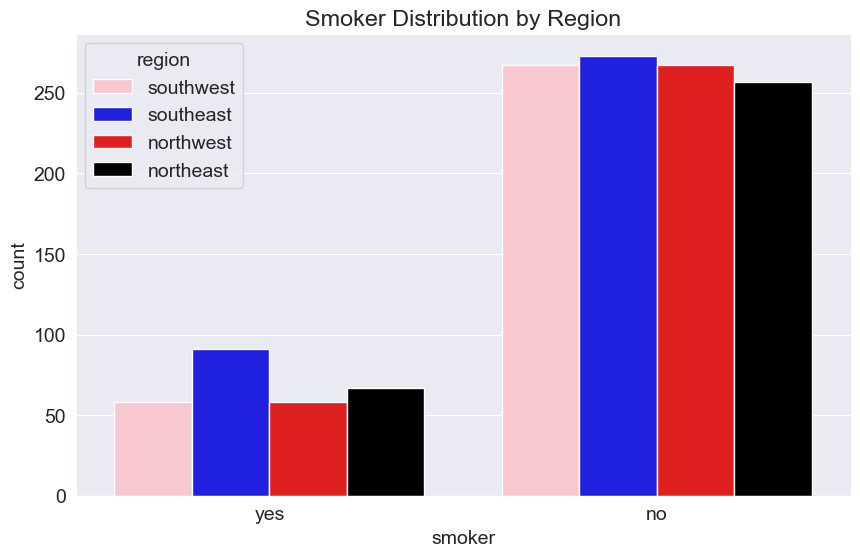

In [36]:
sns.countplot(data=medical_df, x='smoker', hue='region', palette=['pink', 'blue','red','black'])
plt.title('Smoker Distribution by Region')
plt.show()


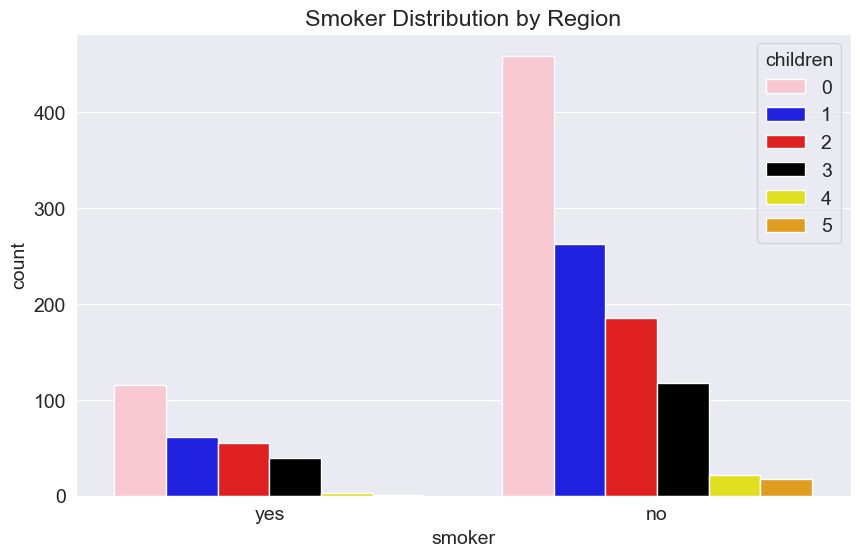

In [38]:
sns.countplot(data=medical_df, x='smoker', hue='children', palette=['pink', 'blue','red','black','yellow','orange'])
plt.title('Smoker Distribution by Region')
plt.show()


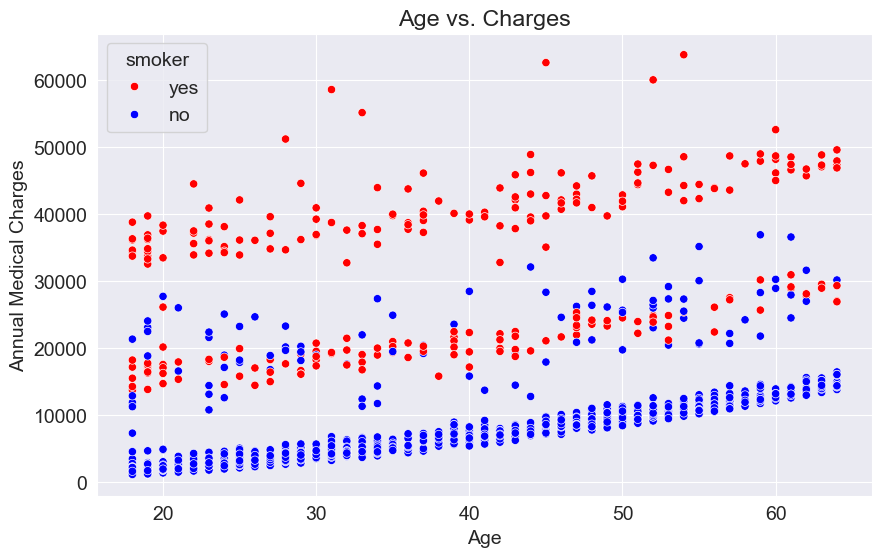

In [41]:
sns.scatterplot(data=medical_df, 
                x='age', 
                y='charges', 
                hue='smoker', 
                palette=['red', 'blue']) # Custom colors for smokers/non-smokers

# Title and labels
plt.title('Age vs. Charges')
plt.xlabel('Age')
plt.ylabel('Annual Medical Charges')

plt.show()


We can make the following observations from the above chart:

* The general trend seems to be that medical charges increase with age, as we might expect. However, there is significant variation at every age, and it's clear that age alone cannot be used to accurately determine medical charges.


* We can see three "clusters" of points, each of which seems to form a line with an increasing slope:

     1. The first and the largest cluster consists primary of presumably "healthy non-smokers" who have relatively low medical charges compared to others
     
     2. The second cluster contains a mix of smokers and non-smokers. It's possible that these are actually two distinct but overlapping clusters: "non-smokers with medical issues" and "smokers without major medical issues".
     
     3. The final cluster consists exclusively of smokers, presumably smokers with major medical issues that are possibly related to or worsened by smoking.

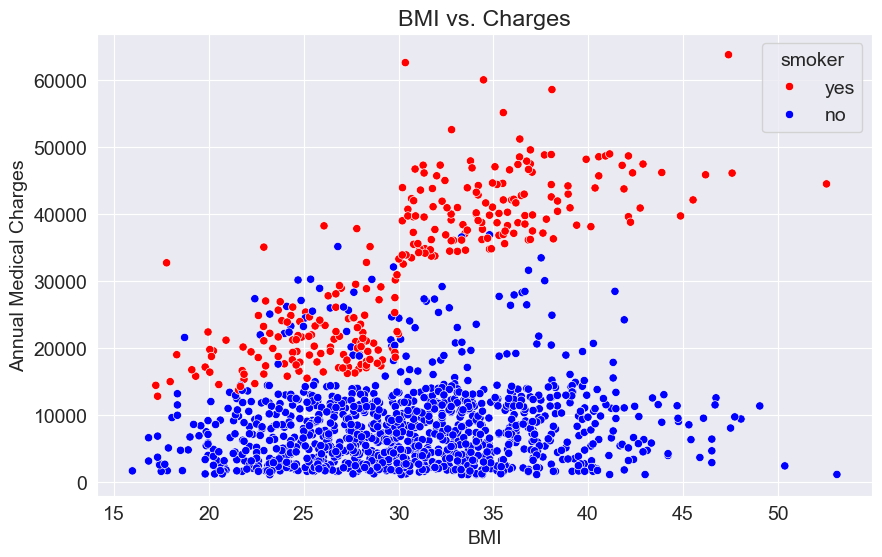

In [42]:
sns.scatterplot(data=medical_df, 
                x='bmi', 
                y='charges', 
                hue='smoker', 
                palette=['red', 'blue']) # Custom colors for smokers/non-smokers

# Title and labels
plt.title('BMI vs. Charges')
plt.xlabel('BMI')
plt.ylabel('Annual Medical Charges')

plt.show()


It appears that for non-smokers, an increase in BMI doesn't seem to be related to an increase in medical charges. However, medical charges seem to be significantly higher for smokers with a BMI greater than 30.


In [ ]:
medical_df['smoker'] = medical_df['smoker'].map({'yes': 1, 'no': 0}).astype(int)

In [59]:
medical_df.corr(numeric_only=True)

,age,bmi,children,smoker,charges
age,1.000000,0.109272,0.042469,-0.025019,0.299008
bmi,0.109272,1.000000,0.012759,0.003750,0.198341
children,0.042469,0.012759,1.000000,0.007673,0.067998
smoker,-0.025019,0.003750,0.007673,1.000000,0.787251
charges,0.299008,0.198341,0.067998,0.787251,1.000000


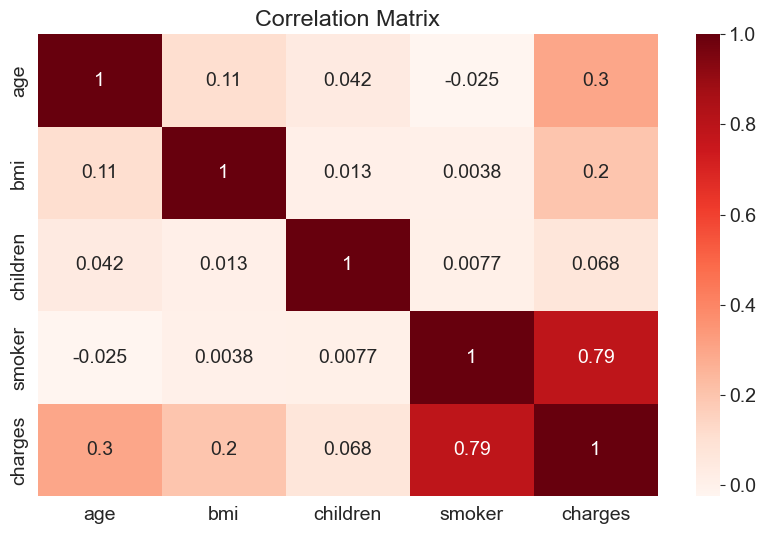

In [61]:
sns.heatmap(medical_df.corr(numeric_only=True), cmap='Reds', annot=True)
plt.title('Correlation Matrix');

# Linear Regression using a Single Feature


We now know that the "smoker" and "age" columns have the strongest correlation with "charges". Let's try to find a way of estimating the value of "charges" using the value of "age" for non-smokers. First, let's create a data frame containing just the data for non-smokers.


In [70]:
non_smoker_df=medical_df[medical_df['smoker']==0]

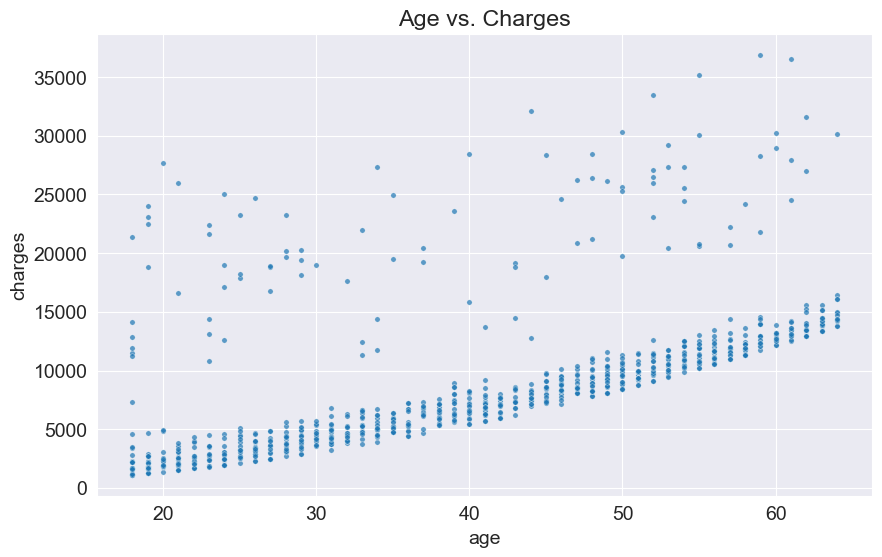

In [71]:
plt.title('Age vs. Charges')
sns.scatterplot(data=non_smoker_df, x='age', y='charges', alpha=0.7, s=15);

In [95]:
from sklearn.linear_model import LinearRegression


In [73]:
model=LinearRegression()
help(model.fit)

In [89]:
inputs = non_smoker_df[['age']]
targets = non_smoker_df.charges
print('inputs.shape :', inputs.shape)
print('targes.shape :', targets.shape)

inputs.shape : (1064, 1)
targes.shape : (1064,)


In [75]:
model.fit(inputs,targets)

LinearRegression()

In [92]:
model.predict([[34]])

c:\Users\Amit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([6995.0424797])

In [93]:
age = int(input("Enter the age to predict insurance charges: "))
age_to_predict = [[age]]  
prediction=model.predict(age_to_predict)
print(f"Predicted charges for a {age}-year-old: {prediction[0]}")


Predicted charges for a 45-year-old: 9934.780520838898


c:\Users\Amit\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [91]:
predictions = model.predict(inputs)
predictions


array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [101]:
from sklearn.metrics import mean_squared_error as rmse
loss = np.sqrt(rmse(targets, predictions))
print('Loss:', loss)

Loss: 4662.3128354612945


Loss (RMSE): 4608.470405038246


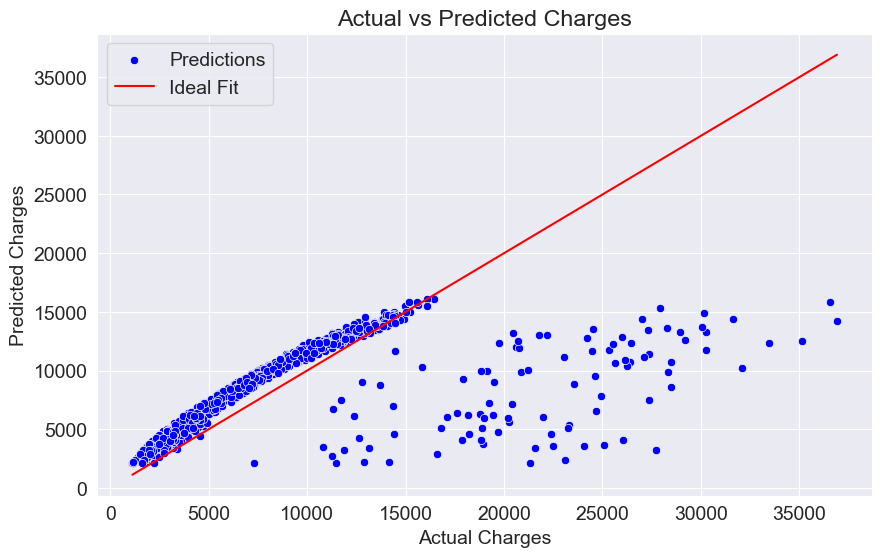

In [111]:
# Calculate predictions
predictions = model.predict(inputs)

# Calculate RMSE
loss = np.sqrt(rmse(targets, predictions))
print('Loss (RMSE):', loss)

# Plotting
plt.figure(figsize=(10, 6))

# Scatter plot of actual vs predicted values
sns.scatterplot(x=targets, y=predictions, color='blue', label='Predictions')

# Plot the ideal line (y = x)
sns.lineplot(x=targets, y=targets, color='red', label='Ideal Fit')

# Add labels and title
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges')
plt.legend()

# Show the plot
plt.show()

our prediction is off by $4000 on average, which is not too bad

# Linear Regression using Multiple Features


In [105]:
inputs,targets=non_smoker_df[['age','bmi']], non_smoker_df['charges']
model=LinearRegression().fit(inputs,targets)
predictions=model.predict(inputs)
print(predictions)
loss=np.sqrt(rmse(targets,predictions))
print(loss)

[2749.08516308 5412.40282772 6673.94368635 ... 2735.99553127 2770.87763119
 3493.32334862]
4662.3128354612945


BMI doesn't seem to reduce the loss by much, as the BMI has a very weak correlation with charges, especially for non smokers.



In [106]:
non_smoker_df.charges.corr(non_smoker_df.bmi)

np.float64(0.08403654312833271)

Linear Regression using BMI alone 

In [107]:
inputs,targets=non_smoker_df[['bmi']], non_smoker_df['charges']
model=LinearRegression().fit(inputs,targets)
predictions=model.predict(inputs)
print(predictions)
loss=np.sqrt(rmse(targets,predictions))
print(loss)

[8694.17241411 8629.99248471 7771.89849358 ... 8539.97388244 8950.89213171
 8029.86846955]
5969.772531913293


our prediction is off by $5800 on average, which is kinda bad

In [109]:
# Create inputs and targets
inputs, targets = non_smoker_df[['age', 'bmi', 'children']], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = np.sqrt(rmse(targets, predictions))
print('Loss:', loss)

Loss: 4608.470405038246


Linear Regression Model for the smokers

In [117]:
smoker_df=medical_df[medical_df['smoker']==1]

In [122]:
inputs,targets=smoker_df[['age', 'bmi', 'children']],smoker_df['charges']
model=LinearRegression().fit(inputs,targets)
predictions=model.predict(inputs)
print(predictions)
loss = np.sqrt(rmse(targets, predictions))
print('Loss:', loss)

[22618.1884404  31693.96060294 45210.77119855 36179.04984359
 32574.75789237 38280.47283345 34491.20326882 37430.66597302
 39673.65505819 50745.19952649 37823.65621158 30644.00355221
 36516.95440038 46376.03606843 28189.41244149 24602.37557441
 14998.88525137 19959.40909163 20205.65661719 37596.31665807
 37711.9779549  22703.37143896 37375.90626513 36588.90352178
 39829.62110441 20982.81806389 15278.84699791 37248.25549378
 23261.8430465  44619.71128168 25523.94958189 34404.01390466
 23193.68014538 11878.55912315 23249.25045408 27265.69025614
 34101.52728187 22194.20777283 25294.47251353 18432.71803104
 36509.95757395 26841.30329054 35229.88217012 48374.79465667
 47853.7091819  36506.45916073 27024.68302364 32545.42035129
 24021.39393614 20407.56334086 24301.50167746 36693.33730705
 34045.05120268  7486.09835485 40859.54427143 41366.99156626
 36478.12904034 40664.63437419 28401.88007544 21556.9488705
 26806.97310137 35645.88191187 51157.66268819 16726.95824663
 40292.87159688 28697.185

The prediction is off by 5700

Linear Regression For the whole data

In [125]:
inputs,targets=medical_df[['age', 'bmi', 'children']],medical_df['charges']
model=LinearRegression().fit(inputs,targets)
predictions=model.predict(inputs)
predictions
loss=np.sqrt(rmse(targets,predictions))
loss

np.float64(11355.317901125973)

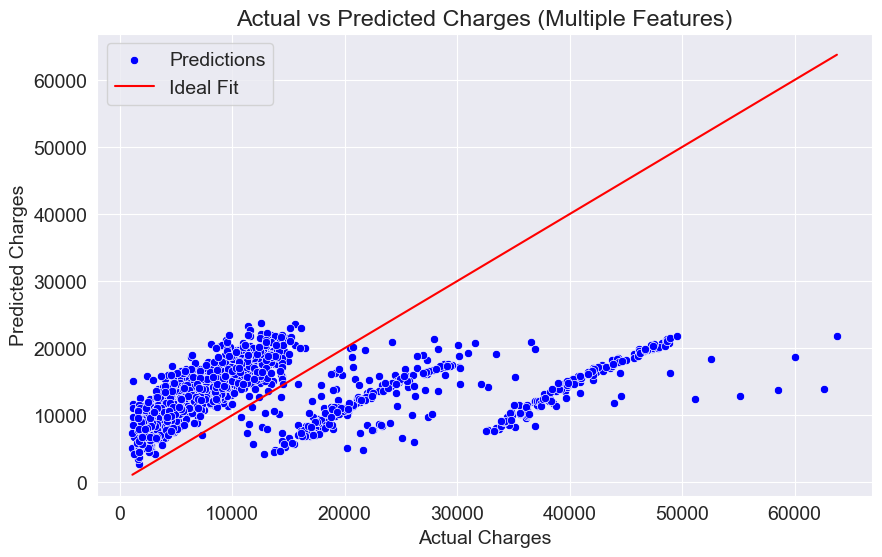

In [126]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=targets, y=predictions, color='blue', label='Predictions')
sns.lineplot(x=targets, y=targets, color='red', label='Ideal Fit')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges (Multiple Features)')
plt.legend()
plt.show()